# Use Case 3: Predicting Energy Consumption in Buildings

### 1. Introduction

Business Problem Statement:

 A building management company wants to predict energy consumption to optimize energy usage and reduce costs.

### 2. Data Collection

In [1]:
# code to generate data
import pandas as pd
import numpy as np
import random

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for dataset generation
num_buildings = 1000  # Number of buildings to simulate

# Generate Building IDs
building_ids = [f"B{str(i).zfill(4)}" for i in range(1, num_buildings + 1)]

# Generate Building Characteristics
building_sizes = np.random.randint(50, 5000, size=num_buildings)  # Size in square meters
building_ages = np.random.randint(1, 100, size=num_buildings)  # Age in years
insulation_types = np.random.choice(['Poor', 'Fair', 'Good', 'Excellent'], size=num_buildings, p=[0.2, 0.3, 0.3, 0.2])

# Generate Weather Data
temperatures = np.random.uniform(-10, 40, size=num_buildings)  # Temperature in Celsius
humidities = np.random.uniform(10, 90, size=num_buildings)  # Humidity in percentage

# Generate Energy Consumption Data
# Energy consumption is influenced by building size, age, insulation, temperature, and humidity
base_energy = building_sizes * np.random.uniform(0.05, 0.15, size=num_buildings)  # Base energy usage
age_factor = building_ages * np.random.uniform(0.1, 0.5, size=num_buildings)  # Older buildings consume more
insulation_factor = [0.8 if i == 'Excellent' else 1.0 if i == 'Good' else 1.2 if i == 'Fair' else 1.5 for i in insulation_types]
weather_factor = (temperatures * 0.5 + humidities * 0.3)  # Weather impact on energy consumption
energy_consumption = base_energy + age_factor + weather_factor * insulation_factor

# Generate Supplier Lead Time
supplier_lead_times = np.random.randint(1, 30, size=num_buildings)  # Lead time in days

# Generate Renewable Energy Source
renewable_energy_sources = np.random.choice(['Solar', 'Wind', 'None'], size=num_buildings, p=[0.4, 0.3, 0.3])

# Create DataFrame
data = pd.DataFrame({
    'BuildingID': building_ids,
    'BuildingSize': building_sizes,
    'BuildingAge': building_ages,
    'InsulationType': insulation_types,
    'Temperature': temperatures,
    'Humidity': humidities,
    'EnergyConsumption': energy_consumption,
    'SupplierLeadTime': supplier_lead_times,
    'RenewableEnergySource': renewable_energy_sources
})

# Save to CSV
data.to_csv('building_energy_data.csv', index=False)

print("Synthetic dataset generated and saved as 'building_energy_data.csv'.")


Synthetic dataset generated and saved as 'building_energy_data.csv'.


### 3. Understanding the Dataset

**Dataset Provided:**

Building Characteristics: Size, Age, Insulation Type

Weather Data: Temperature, Humidity

Energy Consumption: Historical Energy Usage

**Explanation of the Dataset:**

BuildingID: Unique identifier for each building.

BuildingSize: Size of the building in square meters.

BuildingAge: Age of the building in years.

InsulationType: Quality of insulation (Poor, Fair, Good, Excellent).

Temperature: Average temperature in degrees Celsius.

Humidity: Average humidity percentage.

EnergyConsumption: Total energy consumed by the building in kWh.

SupplierLeadTime: Time it takes for energy suppliers to deliver new energy sources.

RenewableEnergySource: Type of renewable energy used (Solar, Wind, None).

# Data Analysis

In [2]:
# Load the dataset
data = pd.read_csv("building_energy_data.csv")

In [3]:
# Display basic information about the dataset
print("Dataset Overview:\n")
print(data.info())

Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BuildingID             1000 non-null   object 
 1   BuildingSize           1000 non-null   int64  
 2   BuildingAge            1000 non-null   int64  
 3   InsulationType         1000 non-null   object 
 4   Temperature            1000 non-null   float64
 5   Humidity               1000 non-null   float64
 6   EnergyConsumption      1000 non-null   float64
 7   SupplierLeadTime       1000 non-null   int64  
 8   RenewableEnergySource  679 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 70.4+ KB
None


In [4]:
# Display the first few rows
print("\nFirst 5 Rows:\n")
data.head()



First 5 Rows:



,BuildingID,BuildingSize,BuildingAge,InsulationType,Temperature,Humidity,EnergyConsumption,SupplierLeadTime,RenewableEnergySource
0,B0001,910,51,Poor,35.347140,14.848393,136.438375,23,NaN
1,B0002,3822,54,Fair,-3.381381,64.831627,270.517752,10,Solar
2,B0003,3142,24,Poor,19.650725,11.997298,310.402460,11,NaN
3,B0004,516,25,Good,19.956029,23.714734,70.034617,6,Solar
4,B0005,4476,71,Good,7.673037,46.286320,412.368667,6,NaN


In [5]:
# Check for missing values
print("\nMissing Values:\n")
data.isnull().sum()


Missing Values:



,0
BuildingID,0
BuildingSize,0
BuildingAge,0
InsulationType,0
Temperature,0
Humidity,0
EnergyConsumption,0
SupplierLeadTime,0
RenewableEnergySource,321


When checking for missing values, we found that only the RenewableEnergySource column had 321 missing entries. This likely means those buildings don't use renewable energy rather than the data being accidentally left out.

**We had a few options:**

Fill with the most common value

Drop rows

Fill with 'None'

Before deciding, let’s check how frequently each renewable energy type appears:

In [6]:
print(data['RenewableEnergySource'].value_counts())

RenewableEnergySource
Solar    374
Wind     305
Name: count, dtype: int64


Since Solar (374) and Wind (305) are fairly close in frequency, filling missing values with either one could introduce bias.By dropping we might lose valuable data.So, we filled them with 'None'.Filling with 'None' is neutral and reflects the possibility that those buildings don’t use renewable energy.


In [7]:
data['RenewableEnergySource'].fillna('None', inplace=True)

<ipython-input-7-32987956507d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['RenewableEnergySource'].fillna('None', inplace=True)


In [8]:
# Check for missing values
print("\nMissing Values:\n")
data.isnull().sum()


Missing Values:



,0
BuildingID,0
BuildingSize,0
BuildingAge,0
InsulationType,0
Temperature,0
Humidity,0
EnergyConsumption,0
SupplierLeadTime,0
RenewableEnergySource,0


In [9]:
print("Duplicate Rows:", data.duplicated().sum())

Duplicate Rows: 0


# Descriptive Statistics

Calculate mean, median, and standard deviation for numerical fields.

In [10]:
# Summary statistics for numerical columns
print("\nDescriptive Statistics:\n")
data.describe()



Descriptive Statistics:



,BuildingSize,BuildingAge,Temperature,Humidity,EnergyConsumption,SupplierLeadTime
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2578.250000,50.149000,15.902084,49.384810,296.190255,14.646000
std,1390.960625,28.855874,14.235700,23.318803,162.629420,8.362692
min,53.000000,1.000000,-9.977861,10.014922,27.606296,1.000000
25%,1389.500000,26.000000,4.136905,28.924968,166.374887,8.000000
50%,2647.000000,49.000000,16.586662,49.393253,273.275106,14.500000
75%,3693.250000,75.250000,28.069674,70.030764,403.408926,22.000000
max,4998.000000,99.000000,39.977196,89.809826,742.628282,29.000000


We analyzed the dataset's numerical columns to understand their distribution.

1. Building Size: Ranges from 53 m² to 4998 m², with an average size of 2578 m².

2. Building Age: The oldest building is 99 years, and the youngest is 1 year, with an average age of 50 years.

3. Temperature: Varies from -10°C to 40°C, with an average of 15.9°C.

4. Humidity: Fluctuates between 10% and 90%, averaging around 49%.

5. Energy Consumption: Some buildings use as little as 27.6 kWh, while others go up to 742.6 kWh, with an average of 296.2 kWh.

6. Supplier Lead Time: Delivery time for energy sources ranges from 1 to 29 days, with a median of 14.5 days.

In [11]:
# Calculate mean, median, and standard deviation
stats = data[['BuildingSize', 'BuildingAge', 'Temperature', 'Humidity', 'EnergyConsumption']].agg(['mean', 'median', 'std'])
print(stats)

        BuildingSize  BuildingAge  Temperature   Humidity  EnergyConsumption
mean     2578.250000    50.149000    15.902084  49.384810         296.190255
median   2647.000000    49.000000    16.586662  49.393253         273.275106
std      1390.960625    28.855874    14.235700  23.318803         162.629420


**What did we analyze?**

We calculated the mean, median, and standard deviation for Building Size, Age, Temperature, Humidity, and Energy Consumption to understand the dataset.

**What did we observe?**

Energy consumption varies a lot (Mean: 296.19 kWh, Std Dev: 162.63 kWh).
Bigger buildings don’t always use more energy, as seen in the high variation.
Temperature and humidity fluctuate significantly, which might impact energy use.
Building age varies widely, meaning older and newer buildings may have different energy efficiencies.

**Why is this important?**

Understanding these variations helps us identify key factors affecting energy use, which will be useful for prediction and optimization.

In [12]:
# Count unique values in categorical columns
print("\nUnique values in categorical columns:\n")
for col in data.select_dtypes(include=['object']).columns:
    print(f"{col}: {data[col].nunique()} unique values")


Unique values in categorical columns:

BuildingID: 1000 unique values
InsulationType: 4 unique values
RenewableEnergySource: 3 unique values


**Visualizations**

**Univarite Analysis**

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

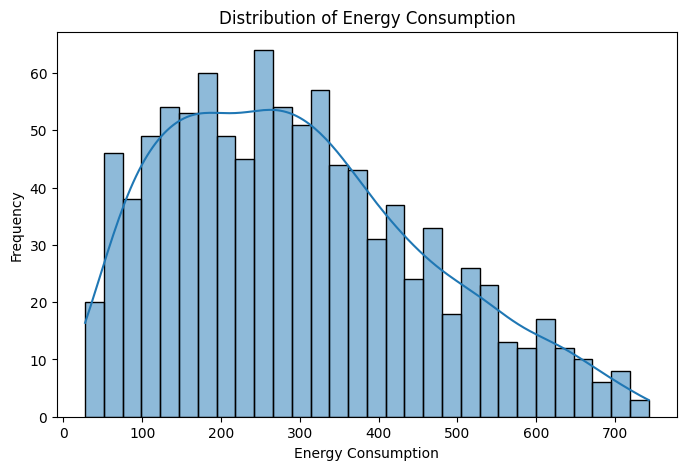

In [14]:
# Distribution of Energy Consumption
plt.figure(figsize=(8,5))
sns.histplot(data['EnergyConsumption'], bins=30, kde=True)
plt.title('Distribution of Energy Consumption')
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.show()

**Description:**

I am analyzing the distribution of energy consumption across buildings to identify common usage patterns and understand variations in energy demand. This will help determine whether most buildings consume similar amounts of energy or if there are significant outliers.

**My Observation:**

From the plot, we can see that the energy consumption distribution is right-skewed, indicating that most buildings consume moderate energy, while a few have very high consumption. The peak occurs between 150 and 350 energy units, suggesting that this range is the most common. The long tail on the right indicates that some buildings consume over 600 units

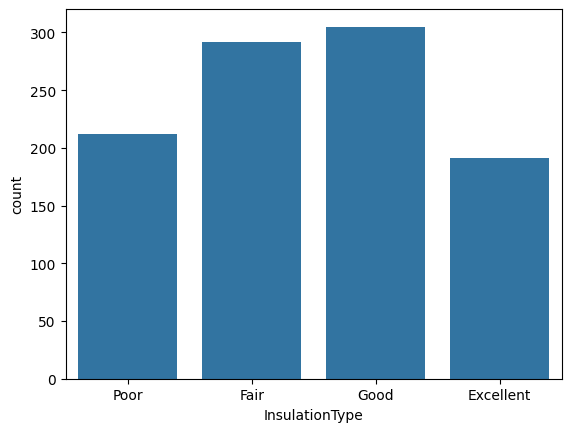

In [15]:
sns.countplot(x=data['InsulationType'])
plt.show()

**Description:**

This is a count plot that shows the distribution of different Insulation Types in the dataset. The x-axis represents the categories of insulation quality (Poor, Fair, Good, Excellent), while the y-axis represents the count of occurrences for each category.

**Observations:**

-Good and Fair insulation types are the most common in the dataset, with slightly more buildings having "Good" insulation.

-Poor and Excellent insulation types are less frequent, with "Excellent" being the least common.

-This suggests that most buildings have moderate to good insulation, while very few have excellent insulation.

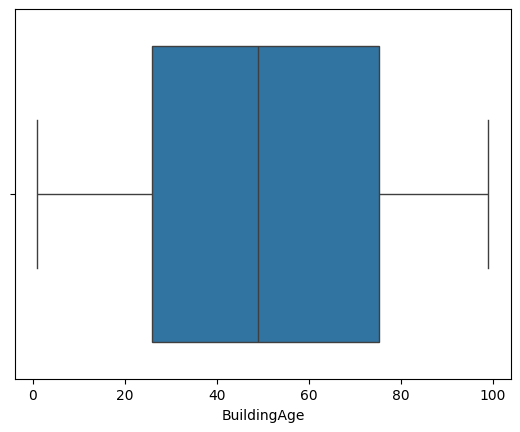

In [16]:
sns.boxplot(x=data['BuildingAge'])
plt.show()

The majority of buildings are between 25 to 75 years old, with a median age of around 50 years. There are no extreme outliers, indicating a consistent distribution of building ages.

**Bivariate Analysis**

**Building Size vs. Energy Consumption**

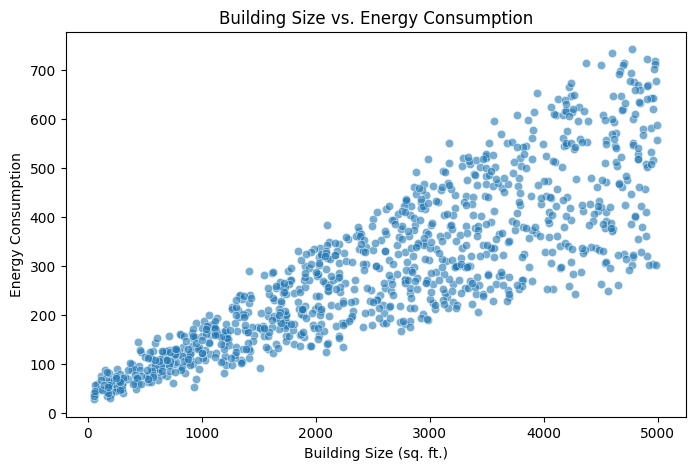

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=data['BuildingSize'], y=data['EnergyConsumption'], alpha=0.6)
plt.title('Building Size vs. Energy Consumption')
plt.xlabel('Building Size (sq. ft.)')
plt.ylabel('Energy Consumption')
plt.show()

**Insights from the Scatter Plot**
1. **Positive Correlation:** There is a clear upward trend, meaning larger buildings generally consume more energy. This makes sense, as larger spaces require more heating, cooling, and electricity.

2. **Some Variability:** Although the trend is positive, there is some scatter, meaning that energy consumption isn’t purely dependent on building size. Other factors like insulation, building age, may also play a role.

3. **Potential for a Predictive Model:** Since the relationship appears strong and linear, we might be able to build a regression model to predict energy consumption based on building size.



**Energy Consumption vs Insulation Type**

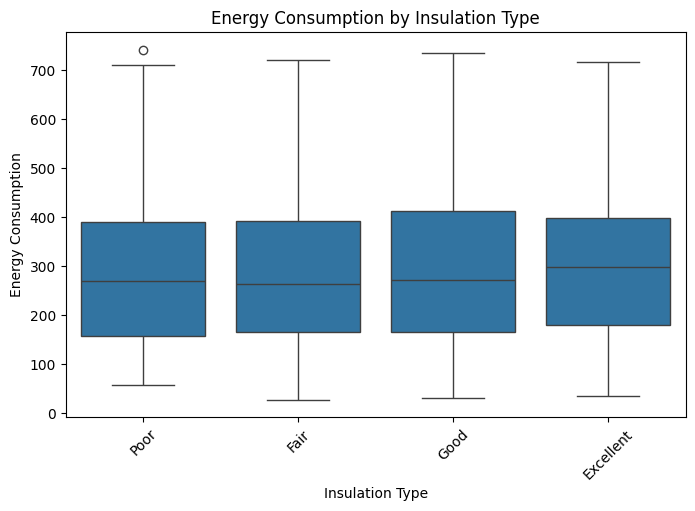

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['InsulationType'], y=data['EnergyConsumption'])
plt.title('Energy Consumption by Insulation Type')
plt.xlabel('Insulation Type')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()

**Description:**

The box plot shows energy consumption distribution across different insulation types (Poor, Fair, Good, and Excellent).

**My Observation:**
The median energy consumption remains quite similar across insulation types.

Even "Excellent" insulation does not drastically reduce median energy use.

The spread of energy consumption is roughly similar across all insulation types.

This suggests that other factors might be influencing energy use more than insulation alone.

There is at least one high outlier in the "Poor" insulation category.


**Temperature vs. Energy Consumption**


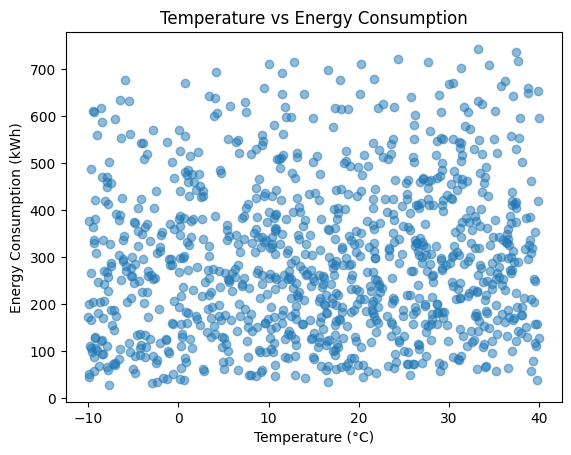

In [19]:
import matplotlib.pyplot as plt

plt.scatter(data['Temperature'], data['EnergyConsumption'], alpha=0.5)
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Temperature vs Energy Consumption')
plt.show()

**Description:**

The scatter plot visualizes the relationship between temperature (°C) and energy consumption (kWh). Each data point represents an observation, showing how energy consumption varies at different temperatures. The goal is to analyze whether there is a clear pattern or trend between these two variables.

**Observation:**

From the plot, we can see that energy consumption is widely spread across different temperature ranges, with no strong visible correlation. Consumption appears to be distributed throughout, suggesting that other factors besides temperature might significantly influence energy usage.









**Average energy consumption by Insulation Type**

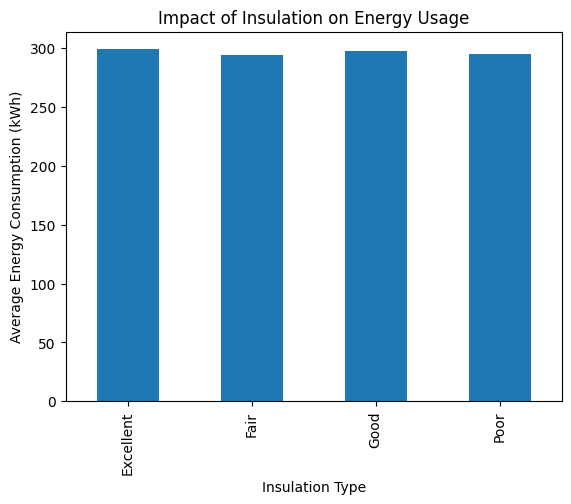

In [20]:
data.groupby('InsulationType')['EnergyConsumption'].mean().plot(kind='bar')
plt.xlabel('Insulation Type')
plt.ylabel('Average Energy Consumption (kWh)')
plt.title('Impact of Insulation on Energy Usage')
plt.show()

**Description:**

This bar chart shows the impact of insulation type on average energy consumption. The x-axis represents different insulation types (Excellent, Fair, Good, and Poor), while the y-axis represents average energy consumption (kWh).

**My Observation:**

-The energy consumption is nearly the same across all insulation types.

-We would typically expect buildings with poor insulation to consume more energy for heating/cooling, but this graph suggests little to no significant difference between the insulation levels.

-Other factors, such as building size, might be affecting energy usage more than insulation.

In [21]:
print(data.dtypes)


BuildingID                object
BuildingSize               int64
BuildingAge                int64
InsulationType            object
Temperature              float64
Humidity                 float64
EnergyConsumption        float64
SupplierLeadTime           int64
RenewableEnergySource     object
dtype: object


**Building Age vs. Energy Consumption**

<ipython-input-22-8f253715430c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=pd.cut(data['BuildingAge'], bins=[0, 25, 50, 75, 100], labels=['0-25', '26-50', '51-75', '76-100']),


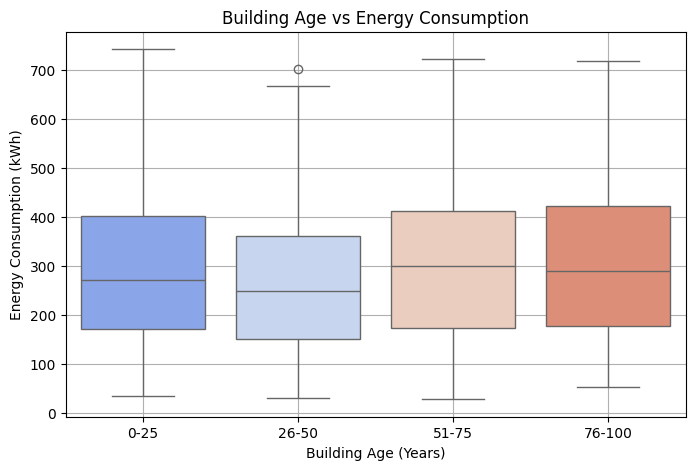

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=pd.cut(data['BuildingAge'], bins=[0, 25, 50, 75, 100], labels=['0-25', '26-50', '51-75', '76-100']),
            y=data['EnergyConsumption'], palette='coolwarm')
plt.xlabel('Building Age (Years)')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Building Age vs Energy Consumption')
plt.grid(True)
plt.show()

**Description:**

The box plot visualizes the relationship between Building Age (years) and Energy Consumption (kWh). It categorizes buildings into four age groups (0-25, 26-50, 51-75, and 76-100 years) and displays the distribution of their energy consumption. The goal is to understand whether building age influences energy usage.

**My Observation:**

Based on the observation, building age does not appear to have a strong influence on energy usage. The median energy consumption is fairly consistent across different age groups, and while there is some variation, the differences are not significant enough to suggest a clear trend.

**Temperature vs. Humidity**

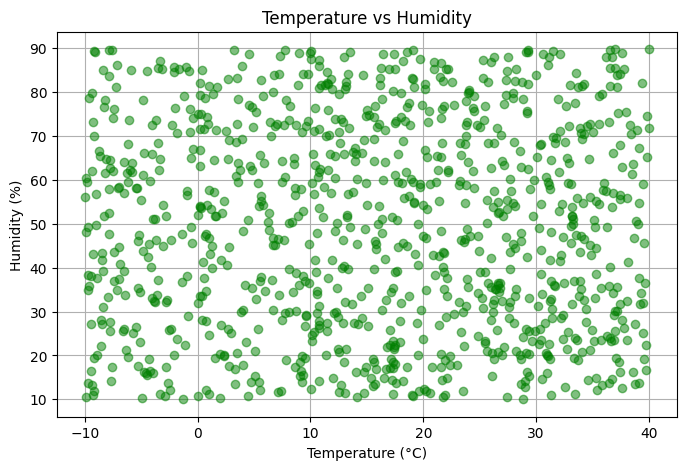

In [23]:
plt.figure(figsize=(8, 5))
plt.plot(data['Temperature'], data['Humidity'], 'o', alpha=0.5, color='green')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity')
plt.grid(True)
plt.show()

**Description:**

The scatter plot visualizes the relationship between Temperature (°C) and Humidity (%). Each point represents a recorded data entry, showing how humidity levels vary across different temperature ranges. The objective is to identify whether a pattern or correlation exists between these two variables.

**Observation:**

The data points are widely scattered, indicating no strong correlation between temperature and humidity. Humidity values remain distributed across the entire temperature range, from -10°C to 40°C, without a clear trend. While some clustering is observed in mid-range temperatures (10°C to 30°C), the overall spread suggests that humidity is influenced by additional factors beyond temperature alone.

**Renewable Energy Source vs. Average Energy Consumption**

<ipython-input-24-2f9370337917>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['RenewableEnergySource'], y=data['EnergyConsumption'], estimator=np.mean, palette='viridis')


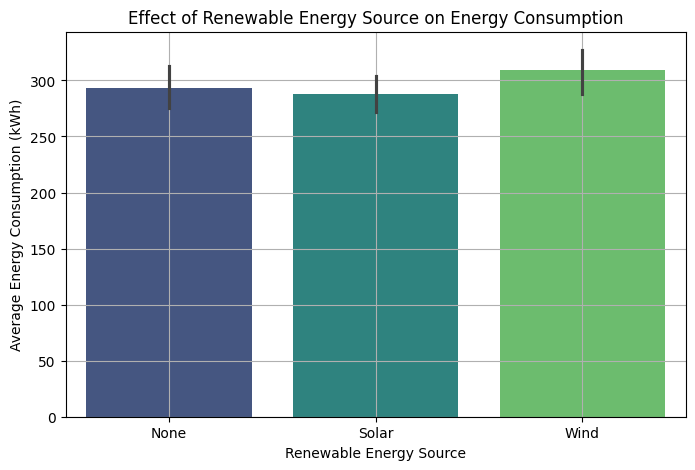

In [24]:
plt.figure(figsize=(8, 5))
sns.barplot(x=data['RenewableEnergySource'], y=data['EnergyConsumption'], estimator=np.mean, palette='viridis')
plt.xlabel('Renewable Energy Source')
plt.ylabel('Average Energy Consumption (kWh)')
plt.title('Effect of Renewable Energy Source on Energy Consumption')
plt.grid(True)
plt.show()

**Description:**

The bar plot illustrates the effect of different renewable energy sources on average energy consumption (kWh). It compares three categories: buildings using no renewable energy, those utilizing solar power, and those using wind energy.
The objective is to assess whether adopting renewable energy sources influences overall energy usage.

**Observation:**

The average energy consumption appears similar across all three categories, with only slight variations. Buildings using wind energy show the highest energy consumption, followed by those without any renewable source, while solar-powered buildings have the lowest average consumption. However, the differences are minimal, suggesting that the type of renewable energy source may not have a significant impact on total energy usage.

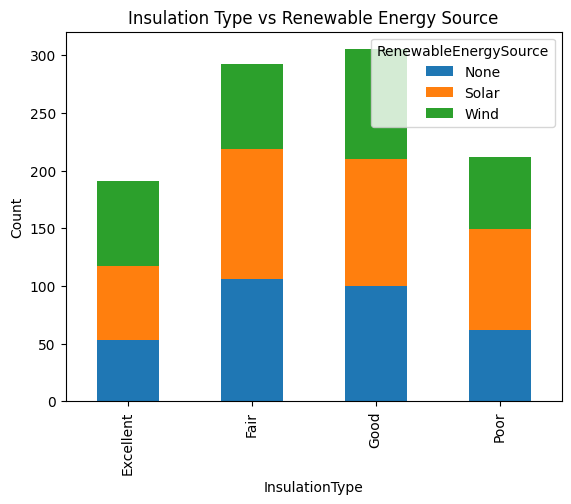

In [25]:
pd.crosstab(data['InsulationType'], data['RenewableEnergySource']).plot(kind='bar', stacked=True)
plt.title("Insulation Type vs Renewable Energy Source")
plt.ylabel("Count")
plt.show()

**My Observations:**

-Homes with Fair and Good insulation have higher adoption of solar and wind energy.

-Homes with Excellent insulation have lower renewable energy usage, possibly due to existing energy efficiency.

-A significant number of homes do not use any renewable energy (blue bars).

-Possible barriers to renewable adoption include cost, awareness, and infrastructure.

-Insights from this data can help in policy-making and promoting sustainability.

**Correlation Analysis**

Find relationships between different factors and energy consumption.



In [26]:
# Drop 'BuildingID'
data = data.drop(columns=['BuildingID'])

# Convert categorical variables using one-hot encoding
data = pd.get_dummies(data, columns=['InsulationType','RenewableEnergySource'])

# Display updated data types
print(data.dtypes)

BuildingSize                     int64
BuildingAge                      int64
Temperature                    float64
Humidity                       float64
EnergyConsumption              float64
SupplierLeadTime                 int64
InsulationType_Excellent          bool
InsulationType_Fair               bool
InsulationType_Good               bool
InsulationType_Poor               bool
RenewableEnergySource_None        bool
RenewableEnergySource_Solar       bool
RenewableEnergySource_Wind        bool
dtype: object


1. Dropped **'BuildingID'**  This column is just an identifier and does not affect energy usage or insulation

2. **One-Hot Encoding** (Converting Categories to Numbers)  Computers understand numbers better than text. Since ‘InsulationType’ and ‘RenewableEnergySource’ are categories (text), we convert them into numerical form for proper analysis.

**Why for Correlation?**

 Correlation measures numerical relationships, and categorical variables must be converted into numbers first. This allows us to see patterns in how insulation and energy choices are related.

In [27]:
data.head()

,BuildingSize,BuildingAge,Temperature,Humidity,EnergyConsumption,SupplierLeadTime,InsulationType_Excellent,InsulationType_Fair,InsulationType_Good,InsulationType_Poor,RenewableEnergySource_None,RenewableEnergySource_Solar,RenewableEnergySource_Wind
0,910,51,35.347140,14.848393,136.438375,23,False,False,False,True,True,False,False
1,3822,54,-3.381381,64.831627,270.517752,10,False,True,False,False,False,True,False
2,3142,24,19.650725,11.997298,310.402460,11,False,False,False,True,True,False,False
3,516,25,19.956029,23.714734,70.034617,6,False,False,True,False,False,True,False
4,4476,71,7.673037,46.286320,412.368667,6,False,False,True,False,True,False,False


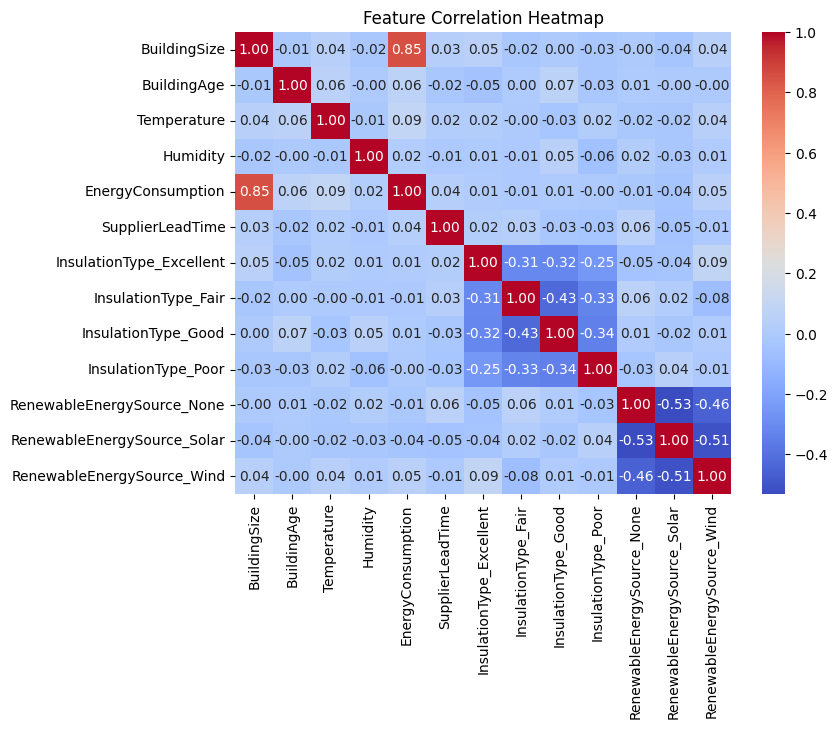

In [28]:
# Compute correlation matrix
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

**Observations from Correlation Analysis**

Building Size and Energy Consumption have a **strong positive correlation (0.85)**. This means that as the size of a building increases, its energy consumption also increases significantly.

Building Age, Temperature, and Humidity have very weak correlations with Energy Consumption. This suggests that these factors do not have a major impact on how much energy a building uses.

Supplier Lead Time shows almost no correlation with Energy Consumption. This indicates that the time taken to receive supplies does not affect the amount of energy used in a building.

Insulation Type categories (Fair, Good, Poor) show negative correlations with each other. This is expected because a building can have only one type of insulation at a time.

Renewable Energy Sources (Solar and Wind) have a negative correlation (-0.51). This suggests that if a building is using solar energy, it is less likely to also use wind energy, and vice versa.

# Predicting Energy Consumption in Buildings -Report

# Executive Summary  
Energy consumption is a crucial aspect of building management, impacting costs and sustainability. This analysis examines key factors influencing energy use, including building characteristics, weather conditions, and insulation quality. Our findings identify which variables significantly impact energy consumption and which have minimal effect. Based on these insights, we propose strategic interventions to optimize energy use and reduce costs.

---

## Methodology  
We conducted a comprehensive analysis using a dataset containing building characteristics, weather data, and historical energy consumption. Our approach included:  

- **Data Cleaning & Preprocessing:** Handling missing values and ensuring data consistency.  
- **Exploratory Data Analysis (EDA):** Visualizing distributions, identifying trends, and assessing relationships between variables.  
- **Correlation Analysis:** Evaluating how different factors impact energy consumption.  
---

## Key Insights  

**1. Energy Consumption Distribution:**  
- Energy consumption varies widely across buildings, with an average usage of **296.2 kWh**.  
- The distribution is **right-skewed**, indicating that most buildings consume moderate energy, while a few consume significantly more.  

**2. Building Size & Energy Use:**  
- A **positive correlation** exists between building size and energy consumption.  
- Larger buildings generally use more energy, but variability suggests additional influencing factors.  

**3. Insulation Type Impact:**  
- The median energy consumption remains **consistent across insulation types**.  
- Even buildings with **excellent insulation** do not show significantly lower energy usage.  
- This suggests other factors may play a larger role.  

**4. Building Age & Energy Use:**  
- Energy consumption **does not vary significantly** with building age.  
- Both newer and older buildings exhibit similar energy usage patterns.  

**5. Temperature & Energy Use:**  
- No strong correlation was found between temperature and energy consumption.  
- Energy use is spread across all temperature ranges, suggesting **other factors play a more dominant role**.  

**6. Humidity & Energy Use:**  
- Similar to temperature, humidity **does not show a strong impact** on energy consumption.  

**7. Renewable Energy Usage:**  
- **321 buildings had missing renewable energy data**, likely indicating they do not use renewable sources.  
- The majority of buildings rely on **solar (374) and wind (305) energy sources**.  

**8. Supplier Lead Time:**  
- Delivery time for energy sources ranges from **1 to 29 days**, with a median of **14.5 days**.  

---

## Recommendations  

**1. Energy Efficiency Programs:**  
- Implement energy audits and **HVAC system optimizations** to improve energy efficiency.  

**2. Building-Specific Energy Strategies:**  
- Since insulation type does not significantly impact energy use, focus on **building size** and **energy-efficient appliances**.  

**3. Predictive Energy Models:**  
- Utilize **machine learning models** to predict energy consumption based on building characteristics and optimize usage.  

**4. Renewable Energy Integration:**  
- Encourage adoption of **solar and wind energy** to reduce dependency on traditional power sources.  

**5. Policy and Incentive Utilization:**  
- Leverage **government incentives and rebates** for energy-efficient upgrades.

**6. Employee and Occupant Awareness Programs:**  
- Conduct **training sessions** to educate building occupants on energy-saving habits.  
- Encourage **behavioral changes**, such as turning off lights and adjusting thermostat settings.  

By implementing these recommendations, building management companies can **optimize energy consumption, reduce costs, and enhance sustainability** across their properties.
